In [18]:
from pharmapynetics.models import PBFTPK, EPBFTPK
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [20]:
import warnings
# warnings.filterwarnings('ignore')

In [21]:
t = np.array([0.,  0.5,  1.,  1.5,  2.,  3.,  3.33,  3.66,  4.,
              4.33,  4.66,  5.,  5.33,  5.66,  6.,  7.,  8., 10.,
              12., 16., 24., 48., 72., 96.])
X = np.array([0.,   98.3, 1150., 1340., 1480., 1400., 1350., 1440.,
              1360., 1340., 1180., 1100., 1080., 1090., 1060., 1030.,
              990.,  964., 1030.,  811.,  597.,  302.,  145.,   59.])

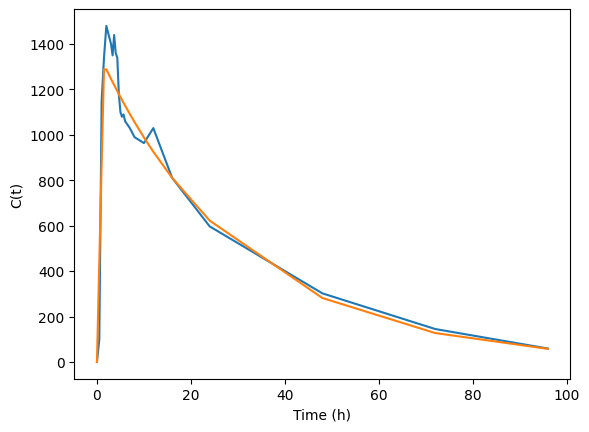

In [22]:
model = EPBFTPK(n_models=1, l=9.0, clipped=False, tau_estimation_method="minmax")
model.fit(t, X)
X_sample = model.sample(t)
plt.plot(t, X)

plt.xlabel("Time (h)")
plt.ylabel("C(t)")

plt.plot(t, X_sample)
plt.show()

In [23]:
r = X - X_sample

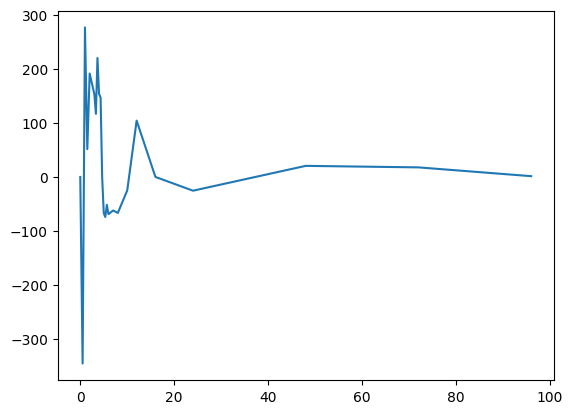

In [24]:
plt.plot(t, r)

In [25]:
model.models[0].tau_0

np.float64(0.0)

In [26]:
r_scaled = r

In [27]:
d, f, v_d, k_a, k_el, tau = model.models[0].d, model.models[0].f, model.models[0].v_d, model.models[0].k_a, model.models[0].k_el, model.models[0].tau     

In [28]:
tau

np.float64(0.020833333333333332)

In [29]:
r_scaled[t < tau]

array([0.])

In [30]:
r_scaled[t < model.models[0].tau] /= (k_el - k_a) / 2 * (1 - np.exp(-2 * t[t < tau] * (k_el - k_a)))

/tmp/ipykernel_114319/3599481971.py:1: RuntimeWarning: invalid value encountered in divide
  r_scaled[t < model.models[0].tau] /= (k_el - k_a) / 2 * (1 - np.exp(-2 * t[t < tau] * (k_el - k_a)))


In [31]:
r_scaled[t >= model.models[0].tau] /= k_el / 2 * (1 - np.exp(-2 * k_el * (t[t < tau] - tau)))

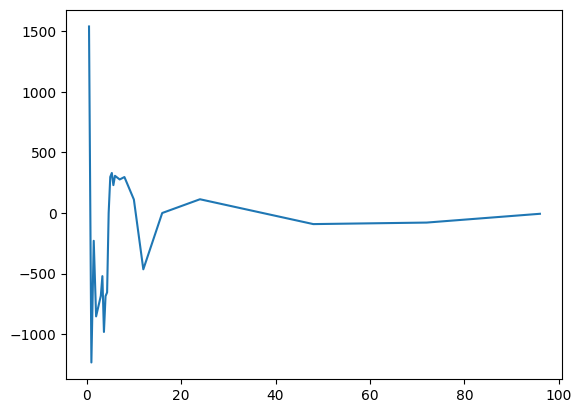

In [32]:
plt.plot(t, r_scaled)

In [33]:
from scipy import stats

In [34]:
stats.normaltest(r_scaled)

NormaltestResult(statistic=np.float64(nan), pvalue=np.float64(nan))